# Performing maximum likelihood estimation

In the last multiple-choice question, you identified the correct code for calculating the Poisson log likelihood for a given parameter combination. In this etivity, your task is to use this code together with your calibration function from module 3 (the previous week) of this course, to fit the model to our flu outbreak data, by finding the parameter values $\beta$ and $\gamma$ that maximise the likelihood. In doing so, you will be calibrating the model using a likelihood approach.

Copy-paste both of these into the cell below, and change the code to calculate the log-likelihood distance function instead of the sum-of-squares. The optimisation process is similar to last week, except that we need to **maximise** the likelihood. To do this, fill in the "optim" command provided below. 

In [1]:
sir_model<-function(timestep,Initial_state_values,parameters)
        {
        with(as.list(c(Initial_state_values, parameters)), {
        N  <- S+I+R
   
        dS <- -beta*S*I/N
        dI <- beta*S*I/N-gamma*I
        dR <- gamma*I
     
        return(list(c(dS, dI, dR)))
    
    })
    }

In [4]:
library(deSolve)
library(reshape2)
library(ggplot2)
SIR_SSQ <- function(parameters,data) { 
    
    Initial_state_values <- c(S = 762, I = 1, R = 0)
    
    parameters<-parameters
    timestep<- seq(0,14,0.1)
    
    
    output <- as.data.frame(ode(y = Initial_state_values, 
                            times = timestep, 
                            func = sir_model,
                            parms = parameters))
    data <- na.omit(data)
    
    LL <- sum(dpois(x = data$number_reported, lambda = 0.6 * output$I[output$time %in% reported_data$time], log = TRUE))
    
    return(LL)

}

In [12]:
# Load the flu dataset of reported cases
reported_data <- read.csv("Graphics_and_Data/idm2_sir_reported_data.csv")

### YOUR CODE GOES HERE ###
reported_data


time,number_reported
1,2
2,5
3,16
4,46
5,135
6,179
7,155
8,140
9,113
10,77


In [10]:
# OPTIMISATION:
## note that this code will not run as it is! You will need to fill in the placeholders.

opt<-optim(par = c(beta = 1.5
                        , gamma = 1) ,
      fn = SIR_SSQ,
      dat = reported_data,
      control = list(fnscale=-1))  # tells optim() to look for the maximum number instead of the minimum (the default)


opt

$par
     beta     gamma 
1.6913755 0.4764659 

$value
[1] -59.23995

$counts
function gradient 
      61       NA 

$convergence
[1] 0

$message
NULL

Finally, since we have the full dataset of the number of infected people, confirm that these parameter values indeed produce a good visual fit to the real data by plotting the model simulation alongside the data, in the cell below.

In [15]:
# Load the flu dataset of the total number infected
full_data <- read.csv("Graphics_and_Data/idm2_sir_data.csv")
full_data

### YOUR CODE GOES HERE ###

time,number_infected
1,3
2,8
3,26
4,76
5,225
6,298
7,258
8,233
9,189
10,128


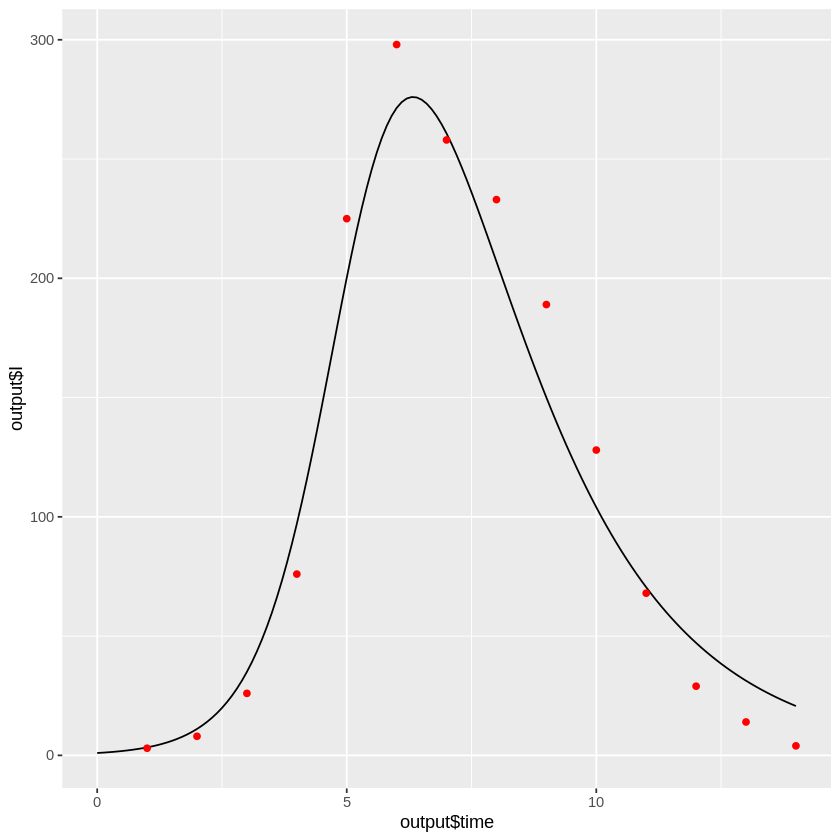

In [16]:
Initial_state_values <- c(S = 762, I = 1, R = 0)
    
    parameters<-opt$par
    timestep<- seq(0,14,0.1)

output <- as.data.frame(ode(y = Initial_state_values, 
                            times = timestep, 
                            func = sir_model,
                            parms = parameters))
ggplot() +
  geom_line(data = output, aes(x = output$time, y = output$I)) +geom_point(data=full_data,aes(x=full_data$time,y=full_data$number_infected),color="red")